# LAb5: Generalização de modelos lineares

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número: 

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab5.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Dados: breast_cancer dataset do sklearn
### Considere os dados do breast_cancer dataset do sklearn, divididos em três conjuntos, treino/validação/teste, segundo os comandos da próxima célula.
* ### X1a: dados de treino (array de $319\times30$)
* ### y1a: classe do dados de treino
* ### X1b: dados de validação (array de $100\times30$)
* ### y1b: classe do dados de validação
* ### X2: dados de treino (array de $150\times30$)
* ### y2: classe do dados de teste

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import  train_test_split
import sklearn.datasets as DT
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

D=DT.load_breast_cancer()
X=D.data
y=D.target

################################################################
#ATENÇÃO: Considerar os casos malígnos como positivos (classe 1)
#Necessário inverter classes
y=np.abs(y-1)
################################################################

#divitir em treino, validação e teste
X1,X2,y1,y2=train_test_split(X,y,test_size=150,stratify=y,random_state=42)
X1a,X1b,y1a,y1b=train_test_split(X1,y1,test_size=100,stratify=y1,random_state=42)

In [109]:
D.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# Pergunta 1: Discriminantes logístico
##  Considere um discriminante logístico com regularização (lasso) e com os parâmetros C=2, solver='saga' e max_iter=5000. Treine o classificador com os conjuntos de treino e validação (419 exemplos).
### a) Imprima o número total de erros e matriz de confusão (não normalizada) deste classificador para o conjunto de teste.
### b) Imprima o índice e os nomes (feature names) das dimensões dos dados que não interferem no processo de classificação (dimensões descartadas).
### c) Calibre este classificador de maneira a ter um número máximo de falsos negativos no teste inferior o igual a 5, e ao mesmo tempo mantendo o número total de erros igual à da alínea 1.a).
### d) Faça um plot da curva ROC deste classificador com os dados de teste. Inclua nesse plot o ponto operacional dos classificadores da alínea 1.a) e 1.c).

## 1.a)

In [110]:
logReg = LogisticRegression(penalty='l1', solver='saga', C=2, max_iter=5000).fit(X1, y1)
y2e = logReg.predict(X2)
print('Erros: ', np.sum(y2!=y2e), '\n')
print('Matriz de confusão:\n', confusion_matrix(y2,y2e))

Erros:  12 

Matriz de confusão:
 [[93  1]
 [11 45]]


## 1.b)

In [111]:
w = logReg.coef_
w = w.squeeze()
idx = np.argwhere(w==0).squeeze()
fn = D.feature_names
print('Dimensões descartadas :', idx.shape[0], '\n')
[print('Dimensão', i, ': ', fn[i]) for i in idx]

Dimensões descartadas : 11 

Dimensão 4 :  mean smoothness
Dimensão 9 :  mean fractal dimension
Dimensão 10 :  radius error
Dimensão 14 :  smoothness error
Dimensão 15 :  compactness error
Dimensão 16 :  concavity error
Dimensão 17 :  concave points error
Dimensão 18 :  symmetry error
Dimensão 19 :  fractal dimension error
Dimensão 24 :  worst smoothness
Dimensão 29 :  worst fractal dimension


[None, None, None, None, None, None, None, None, None, None, None]

## 1.c)

In [112]:
y2c = logReg.decision_function(X2)
print(confusion_matrix(y2,y2c>-1.41))

[[87  7]
 [ 5 51]]


## 1.d)

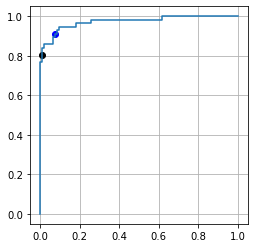

In [113]:
f, t, l = roc_curve(y2, y2c)

#Classificador 1

#FP/(FP+TN)
f1 = 1/(93+1)
#TP/(TP+FN)
t1 = 45/(45+11)

#Classificador 2

#FP/(FP+TN)
f2 = 7/(87+7)
#TP/(TP+FN)
t2 = 51/(5+51)

plt.plot(f1,t1,'ok')
plt.plot(f2,t2,'ob')

plt.plot(f, t)
plt.axis('scaled')
plt.grid()



<hr style="border:2px solid black"> </hr>

# Pergunta 2 - SVMs:
## Considere o classificador da função $\texttt{SVC}$ com os parâmetros $\texttt{kernel='rbf'}$ e $\texttt{C=2}$.
### a) Faça um pré-processamento dos dados usando a função $\texttt{StandardScaler}$. Treine esta função com os dados treino e aplique a transformação aos três conjuntos (treino, validação e teste). Use os dados pré-processados nas alíneas seguintes.
### b) Pertende-se estimar o valor do parâmetro $\texttt{gamma}$  ($\gamma$) mais adequado para este problema. Para tal, use o conjunto de validação para achar o valor de $\gamma$ que resulta no menor número de erros (treine o $\texttt{SVC}$ com o conjunto de treino). Teste os seguintes valores de $\gamma$: $[0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175]$.
### c) Volte a treinar o classificador $\texttt{SVC}$ com os dados de treino e validação, e com o melhor valor de $\gamma$. Faça um plot da curva ROC deste classificador com os dados de teste. Inclua nesse plot o ponto operacional do classificador. 
### d)  Calibre o classificador da alínea anterior de modo a obter zero (0) falsos negativos nos dados de teste. Após a calibração qual o número mínimo de falso positivos obtidos no teste?

## 2.a)

In [114]:
from sklearn.preprocessing import StandardScaler

#treinar com dados de treino
sc = StandardScaler().fit(X1a)
#dados de treino
X1an = sc.transform(X1a)
#dados de validaçao
X1bn = sc.transform(X1b)
#dados de teste
X2n = sc.transform(X2)


## 2.b)

In [115]:
#svm=SVC(kernel='rbf',C=2)
Gamma=np.arange(0.0050,0.02,0.0025)
bestScore = 0
bestGama = 0

for g in Gamma:
    #treinar svc com dados de treino
    svm=SVC(kernel='rbf', C=2, gamma=g).fit(X1an, y1a)
    score=svm.score(X1bn, y1b)
    #se score com gamma atual for mlhr que anterior, substituir o bestGama 
    if score>bestScore:
        bestScore = score
        bestGamma = g

print('Best Gamma:', bestGamma)
print('Best Score:', bestScore, '\n')
print('Matriz de confusão do conjunto de validação')
print(confusion_matrix(y1b, svm.predict(X1bn)))


Best Gamma: 0.009999999999999998
Best Score: 0.99 

Matriz de confusão do conjunto de validação
[[63  0]
 [ 2 35]]


## 2.c)

[[94  0]
 [ 2 54]]


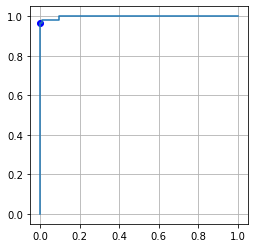

In [116]:
#aplicar standardscaler aos dados de treino e validação
X1n = sc.transform(X1)
#treinar svc com o mlhr gamma
svm = SVC(kernel='rbf',C=2,gamma=0.01).fit(X1n,y1)
#classificacao dos dados de teste
y2c = svm.decision_function(X2n)
#curva ROC
ff, tt, ll= roc_curve(y2, y2c)

print(confusion_matrix(y2,svm.predict(X2n)))

#FP/(FP+TN)
f1 = 0
#TP/(TP+FN)
f2 = 54/(2+54)

plt.plot(f1, f2, 'ob')
plt.plot(ff, tt)
plt.axis('scaled')
plt.grid()

## 2.d)

In [117]:
print(confusion_matrix(y2, y2c>=-.9))
print('\nFalsos positivos: 10')

[[84 10]
 [ 0 56]]

Falsos positivos: 10
